In [1]:
# Imports
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from models.singleheadattention import SingleHeadAttention

Using device: mps


In [10]:
# Parameters
d_list = [10,100, 250, 1000]
n_train = 500
n_test = 10000
beta = 0.02
rho = 30
eta = 0.1
r = 10
R = 10
margin_lambda = 1.0

In [2]:
# Use GPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
        device = torch.device("cpu")
print("Using device:", device)

Using device: mps


In [3]:
import importlib
import utils.generate_data
importlib.reload(utils.generate_data)
from utils.generate_data import generate_data

In [37]:
import importlib
import utils.train_model
importlib.reload(utils.train_model)
from utils.train_model import train_with_max_margin, plot_metrics

d =  10
Epoch 1
Epoch 50
Epoch 100
Epoch 150


d =  100
Epoch 1
Epoch 50
Epoch 100
Epoch 150


d =  250
Epoch 1
Epoch 50
Epoch 100
Epoch 150


d =  1000
Epoch 1
Epoch 50
Epoch 100
Epoch 150




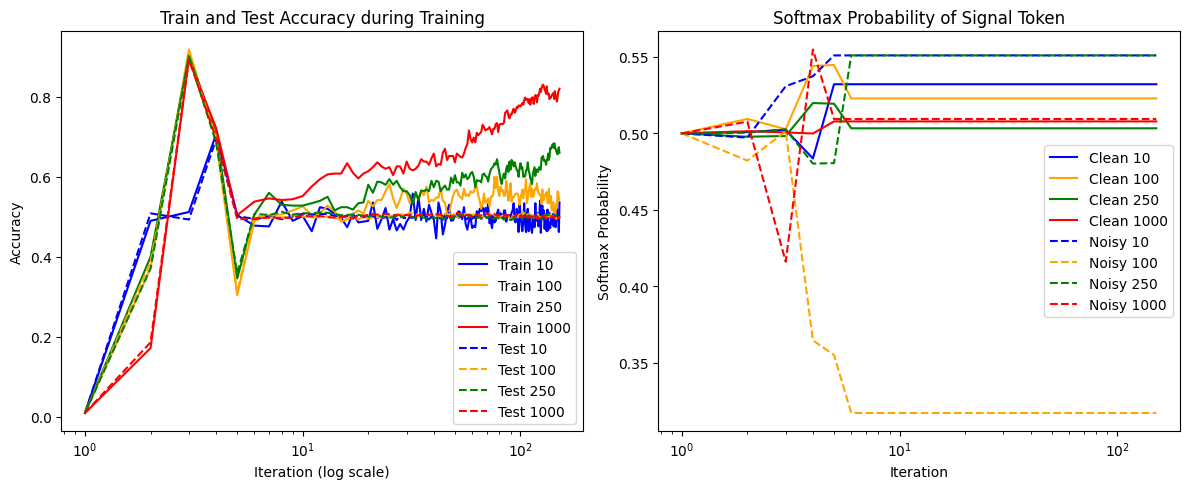

In [38]:
# Generate data
train_accs, test_accs, clean_probas, noisy_probas = [], [], [], []

for d in d_list:
    print('d = ', d)
    # Training and test data
    X_train_np, y_train_np, clean_indices_train, noisy_indices_train = generate_data(n_train, d, rho, eta= 0.1, seed = 1 + d)
    X_test_np,  y_test_np, clean_indices_test, noisy_indices_test = generate_data(n_test, d, rho, eta= 0.1, seed = 2 + d)


    X_train = torch.tensor(X_train_np, dtype=torch.float32, device=device)
    y_train = torch.tensor(y_train_np, dtype=torch.float32, device=device)
    X_test = torch.tensor(X_test_np, dtype=torch.float32, device=device)
    y_test = torch.tensor(y_test_np, dtype=torch.float32, device=device)


    # Model and optimizer
    model = SingleHeadAttention(d).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=beta)

    # Train model
    train_acc, test_acc, clean_proba, noisy_proba = train_with_max_margin(model, 
                                                                                optimizer, 
                                                                                X_train, 
                                                                                y_train, 
                                                                                X_test, 
                                                                                y_test, 
                                                                                clean_indices_train, 
                                                                                noisy_indices_train, (r,R))

    train_accs.append(train_acc)
    test_accs.append(test_acc)
    clean_probas.append(clean_proba)
    noisy_probas.append(noisy_proba)

    print('\n')

labels_train_test = [[f'Train {d}' for d in d_list], [f'Test {d}' for d in d_list]]
labels_noise = [[f'Clean {d}' for d in d_list], [f'Noisy {d}' for d in d_list]]
plot_metrics(train_accs, test_accs, clean_probas, noisy_probas, labels_train_test, labels_noise)
    
